# Preamble

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model, datasets

#from utils import plot_confusion_matrix
from matplotlib.colors import ListedColormap


import itertools

In [3]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generate Training Data

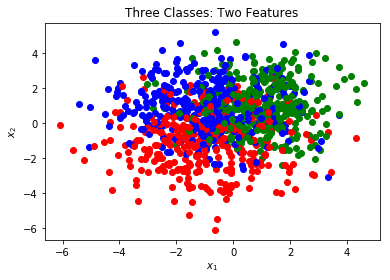

In [5]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
c = np.array(["r","g","b"])
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Three Classes: Two Features")
plt.show()

# Plot the data

# Centroid Classifier

## Training Classifier

In [6]:
X = X.T
clf = NearestCentroid()
clf.fit(X, y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

## Drawing Decision Boundaries

(-7.091273175458428, 5.588726824541301, -7.109110491713596, 6.19088950828612)

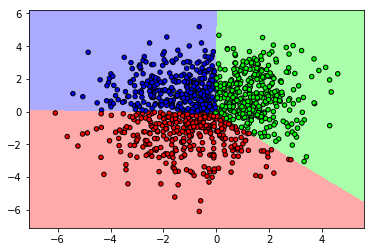

In [7]:
h = 0.02
y_pred = clf.predict(X)
#print(shrinkage, np.mean(y == y_pred))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,
          edgecolor='k', s=20)
#plt.title("3-Class classification (shrink_threshold=%r)"
#              % shrinkage)
plt.axis('tight')

## Confusion Matrix

Normalized confusion matrix
[[0.71810089 0.11275964 0.16913947]
 [0.08656716 0.74029851 0.17313433]
 [0.18597561 0.22560976 0.58841463]]


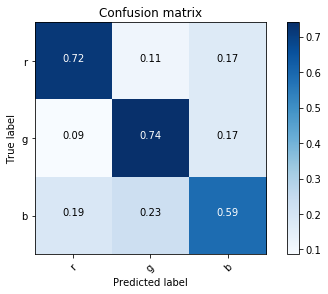

In [8]:
cm = confusion_matrix(y,y_pred)
plot_confusion_matrix(cm,c)

# Naive Bayes Classifier

## Training

In [9]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None)

## Drawing Decision Boundaries

(-7.091273175458428, 5.588726824541301, -7.109110491713596, 6.19088950828612)

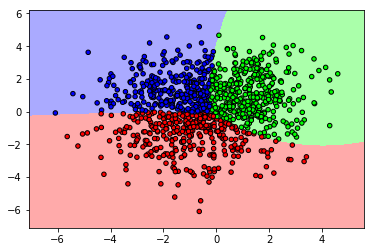

In [10]:
h = 0.02
y_pred = clf.predict(X)
#print(shrinkage, np.mean(y == y_pred))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,
          edgecolor='k', s=20)
#plt.title("3-Class classification (shrink_threshold=%r)"
#              % shrinkage)
plt.axis('tight')

## Confusion Matrix

Normalized confusion matrix
[[0.71513353 0.115727   0.16913947]
 [0.09552239 0.7641791  0.14029851]
 [0.18902439 0.25304878 0.55792683]]


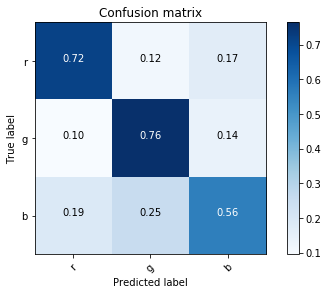

In [11]:
cm = confusion_matrix(y,y_pred)
plot_confusion_matrix(cm,c)

# Logistic Regression

## Training

In [12]:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Drawing Decision Boundaries

(-7.091273175458428, 5.588726824541301, -7.109110491713596, 6.19088950828612)

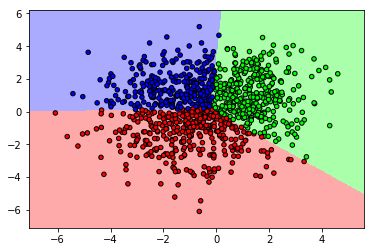

In [13]:
h = 0.02
y_pred = clf.predict(X)
#print(shrinkage, np.mean(y == y_pred))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,
          edgecolor='k', s=20)
#plt.title("3-Class classification (shrink_threshold=%r)"
#              % shrinkage)
plt.axis('tight')

## Confusion Matrix

Normalized confusion matrix
[[0.74777448 0.10385757 0.14836795]
 [0.10746269 0.74328358 0.14925373]
 [0.22256098 0.22560976 0.55182927]]


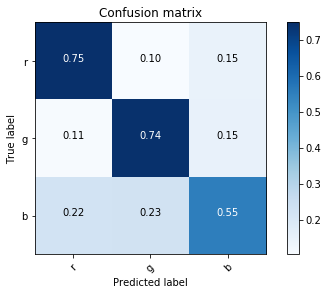

In [14]:
cm = confusion_matrix(y,y_pred)
plot_confusion_matrix(cm,c)